In [168]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

class TwophaseSimpleSort():

    def __init__(self, amount_of_files=2, amount_of_cicles=2, amount_of_num=None, warst_situation=False):
        """
        Это конструктор класса. Здесь задаётся массив для сортировки, счётчик операций, а так же здесь сохраняется история изменения массива
        self.path_to_array_file - Это ссылка на файл для записи массива
        self.array_to_sort - Массив NumPy, который должен быть отсортирован
        self.history_of_sorting - Двумерный массив NumPy. В каждой строчке хранится история массива по каждой итерации
        self.count_of_iterations - Это счётчик операций  
        self.merge_files - Это ссылки на файл, в которые будет записываться элементы массивов для сортировки
        
        Вход :
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        amount_of_cicles - Если мы не указали кол-во переменных в массиве, 
        то эта функция подберёт оптимальное кол-во элементов для определённого кол-ва циклов сортировки
        amount_of_num - Кол-во переменных в массиве, который надо отсортировать
        warst_situation - Создать обратно отсортированный массив
        """
        self.path_to_array_file = "Mass_TSS.csv"
        if(amount_of_num == None):
            if (warst_situation):
                self.array_to_sort = np.arange(amount_of_files ** amount_of_cicles, 0, -1, dtype='int')
            else:
                self.array_to_sort = np.random.randint(100, 1000, amount_of_files ** amount_of_cicles, dtype='int')
        else:
            if (warst_situation):
                self.array_to_sort = np.arange(amount_of_num, 0, -1, dtype='int')
            else:
                self.array_to_sort = np.random.randint(100, 1000, amount_of_num, dtype='int')
        self.history_of_sorting = self.array_to_sort.copy()
        self.count_of_iterations = 0

        my_file = open(self.path_to_array_file, "w+")
        my_file.close()

        np.savetxt(self.path_to_array_file, self.array_to_sort, delimiter=",", fmt='%4.0i')

        self.merge_files = [f"Merge_TSS{i}.csv" for i in range(amount_of_files)]
        [open(i, "w+").close() for i in self.merge_files]

        pass

    def CalculateAlgorithmEfficiency(self, start_array_len=1, end_array_len=100, warst_situation=False, amount_of_files=2):
        """
        Это функция, которая расчитывает кол-во итерация для определённого интервала размеров массивов
        Сначала мы создаём массив NumPy в котором будем хранить кол-во итераций для каждого размера массива
        После в цикле вызываем метод для произведения вычисления кол-ва итераций для массива
        В конце мы создаём График в котором показываем зависимость кол-ва операций от размера массива
        
        Вход :
        start_array_len - Началало интервала для размера массивов (размеры массивов [start_array_len...end_array_len])
        end_array_len - Конец интервала для размера массивов (размеры массивов [start_array_len...end_array_len])
        warst_situation - Создать обратноотсортированный массив
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        """
        count_of_iterations_array = np.array([], dtype='int')

        for array_len in range(start_array_len, end_array_len + 1):
            self.MergeSort(amount_of_num=array_len, amount_of_files=amount_of_files, warst_situation=warst_situation)
            count_of_iterations_array = np.append(count_of_iterations_array, self.count_of_iterations)

        self.CreatePlotOfAlgorithmEfficiency(start_array_len, end_array_len, count_of_iterations_array, amount_of_files)
        pass


    def MergeSort(self, amount_of_files=2, amount_of_cicles=2, amount_of_num=None, warst_situation=False, create_result_log=False):
        """
        Эта функция позволяет создать и отсортировать массив с определённм кол-вом элементов и с опред. кол-вом вспомогательных файлов
        В самом начале функции мы обновляем информацию в нашем классе с определёнными особенностями
        После чего мы заходим в цикл в котором будет две фазы - Разбиение и Слияние
        Причём слияние может быть двух типов, в зависимсоти от кол-ва переменных
        После каждого такого цикла мы создаём историю изменения нашего массива и инкрементируем кол-во итераций
        В конце мы преобразуем массив истории измениния массива из одномерного в двумерный массив
        И в зависимости от нужды выводим результат сортировки
        
        Вход :
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        amount_of_cicles - Кол-во циклов для сортировки
        amount_of_num - Кол-во переменных, которое должно хранится в массиве
        warst_situation - Создать обратноотсортированный массив
        create_result_log - Создать отчёт об сортировки нашего массива
        """
        if(amount_of_num == None):
            self.__init__(amount_of_files, amount_of_cicles, warst_situation=warst_situation)
        else:
            self.__init__(amount_of_files, amount_of_num=amount_of_num, warst_situation=warst_situation)

        while(int(amount_of_files**(self.count_of_iterations)) < len(self.array_to_sort)):
            self._Split(amount_of_files)
            if(amount_of_num == None):
                self._Merge_Numpy(amount_of_files)
            else:
                self._Merge_List(amount_of_files)

            self.history_of_sorting = np.append(self.history_of_sorting, self.array_to_sort.copy())
            self.count_of_iterations += 1

        if(amount_of_num == None):
            self.history_of_sorting = self.history_of_sorting.reshape(-1, int(amount_of_files**(self.count_of_iterations)))
            self.history_of_sorting = self.history_of_sorting.astype(int)
        else:
            self.history_of_sorting = self.history_of_sorting.reshape(-1, amount_of_num)

        if(create_result_log):
            print(f"Изначальный массив: {self.history_of_sorting[0]}")
            print(f"Отсортированный массив: {self.history_of_sorting[-1]}")
            print(f"Кол-во итераций: {self.count_of_iterations}")
            self.VisualizeSortHistory()
        pass

    def _Split(self, amount_of_files=2):
        """
        Функция разделения массива по файлам
        Сначала мы скачиваем массив из файла и создаём вспомагательный двух мерный массив для сохранения информации в вспомогательные файлы
        Расчитываем размер чередующейся группу, которую мы будем записывать в массив
        Далее создаём вспомогательные счётчики, чтобы понимать куда записывать наш элемент из массива, который надо отсортировать
        И открываем цикл в котором делим наш массив на подмассивы
        После того, как мы разделили наш массив на подмассивы сохраняем наши массивы в спомогательные файлы и инкрементируем счётчик операций
        
        Вход :
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        """
        self.array_to_sort = np.loadtxt(self.path_to_array_file, delimiter=",")
        array_to_stor_information = [[] for _ in range(amount_of_files)]
        amount_of_num_to_get_for_cicle = int(amount_of_files**(self.count_of_iterations))
        counter_of_array_num = 0
        counter_of_file_index = 0
        for i in self.array_to_sort:
            array_to_stor_information[counter_of_file_index].append(i)
            counter_of_array_num += 1

            if(counter_of_array_num >= amount_of_num_to_get_for_cicle):
                counter_of_file_index += 1
                counter_of_array_num = 0
            if(counter_of_file_index >= amount_of_files):
                counter_of_file_index = 0

        counter_of_file_index = 0
        for i in array_to_stor_information:
            np.savetxt(self.merge_files[counter_of_file_index], np.array(i, dtype='int'), delimiter=",", fmt='%4.0i')
            counter_of_file_index += 1
        pass

    def _Merge_Numpy(self, amount_of_files=2):
        """
        Функция слияния информации из файлов в один массив с помощью массивов NumPy
        Сначала создаём пустые вспомогательные массивы 
        Первый массив будет представлять из себя двумерный массив и он будет содержать неотсортированную информацию из файлов
        А второй уже будет результирующим массивом, в котором информация уже будет отсротированны
        Сначала в цикле мы загружаем информацию из файлов, а после изменяем форму массива из одномерной в двумерную
        А далее делим нашу матрицу на группы с определённым размером, далее мы изменяем его форму и из матрицы превращаем этот срез в одномерный массив
        После чего сортируем этот массив и добавляем его в результирующий массив
        А в конце сохраняем результат в файл для хранения массива
        
        Вход :
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        """
        array_to_stor_information = np.array([], dtype='int')
        result = np.array([], dtype='int')

        for i in self.merge_files:
            array_from_file = (np.loadtxt(i, delimiter=","))
            array_to_stor_information = np.append(array_to_stor_information, array_from_file)

        array_to_stor_information = array_to_stor_information.reshape(-1, amount_of_files)

        for i in range(0, len(array_to_stor_information[0]), int(amount_of_files**(self.count_of_iterations))):
            result = np.append(result,
                               np.sort(np.ravel(array_to_stor_information[:, i:i+int(amount_of_files**(self.count_of_iterations))]),
                               kind="stable"))

        self.array_to_sort = result
        np.savetxt(self.path_to_array_file, self.array_to_sort, delimiter=",", fmt='%4.0i')
        pass

    def _Merge_List(self, amount_of_files=2):
        """
        Функция слияния информации из файлов в один массив с помощью list
        Она отличается от аналога написанном с помощью массива NumPy, тем, что эта функция может работать с произвольным числом элементов
        Массивы NumPy не могут быть зубчатыми в отличии от list, но list медленнее отночительно массивов NumPy
        Сначала создаём пустые вспомогательные массивы 
        Первый массив будет представлять из себя двумерный массив и он будет содержать неотсортированную информацию из файлов
        А второй уже будет результирующим массивом, в котором информация уже будет отсротированны
        В цикле читаем каждую строчку из CSV файлов, записываем в цикл result, а после этот цикл передаём в определённую строчку массива array_to_stor_information
        А далее отсортируем определённые группы нашего зубчатого массива
        В цикле создаём вспомогательный массив и добавляем туда определённые элементы, после чего сортируем их
        В итоге полученный результат записываем в конец массива result
        А в конце сохраняем нашу информацию в массив класса, а потом в файл для хранения массива
        
        Вход :
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        """
        array_to_stor_information = [[] for _ in range(amount_of_files)]
        result = list()

        for i in range(len(self.merge_files)):
            with open(self.merge_files[i]) as file:
                result = list(csv.reader(file, delimiter='\n'))
                result = [int(x[0]) for x in result]
                array_to_stor_information[i] = result

        result = list()

        for i in range(0, len(array_to_stor_information[0]), int(amount_of_files**(self.count_of_iterations))):
            a = []
            for j in range(len(self.merge_files)):
                a.extend(array_to_stor_information[j][i:i+int(amount_of_files**(self.count_of_iterations))])
            a.sort()
            result.extend(a)

        self.array_to_sort = np.array(result, dtype='int')
        np.savetxt(self.path_to_array_file, self.array_to_sort, delimiter=",", fmt='%4.0i')
        pass

    def VisualizeSortHistory(self):
        """
        Эта функция позволяет визуализировать матрицу истории изменения массива по мере его сортировки
        В результате получается график в виде матрицы по строчка которого показана история изменения массива, а по столбцам его элемнеты
        """
        fig = plt.figure(figsize=(15, 11))
        ax = fig.add_subplot()

        ax.set_xlabel("Ячейки массива", fontsize='xx-large')
        ax.set_ylabel(f"Порядок сортировки массива. Кол-во операций: {self.count_of_iterations}",
                      fontsize='xx-large')

        im = ax.imshow(self.history_of_sorting, cmap='plasma')
        plt.colorbar(im, label='Перменная, хранящаяся в ячейке массива')
        plt.show()
        pass

    def CreatePlotOfAlgorithmEfficiency(self, min_array_len, max_array_len, count_of_iterations_array, amount_of_files):
        """
        Эта функция позволяет визуализировать зависимость кол-ва итераций алгоритма от кол-ва переменных массива
        Так же на графике строится линия log_m(n), где m - колв-во вспомогательных файлов, а n - размер массива
        
        Вход :
        min_array_len - Минимальная длинна массива для визуализации
        max_array_len - Максимальная длинна массива для визуализации
        count_of_iterations_array - Массив кол-ва итераций для каждого размера массива
        amount_of_files - Кол-во вспомогательных файлов для сортировки массива
        """
        with plt.style.context('seaborn'):
            fig = plt.figure(figsize=(22, 13))
            ax = fig.add_subplot()
            x = np.arange(min_array_len, max_array_len+1)
            y1 = np.array([math.log(a, amount_of_files) for a in x])

            ax.set_xlabel("Размер массива", fontsize='xx-large')
            ax.set_ylabel("Кол-во итераций", fontsize='xx-large')

            ax.plot(x, count_of_iterations_array, color='m', marker="H", linewidth=1.5, markersize=6)
            ax.plot(x, y1, linewidth=3)

            ax.legend([f'Кол-во итераций при {amount_of_files} файлах', r'$f(x) = O(log_m(n))$'], loc='lower center', facecolor="#aaa",
                      fontsize='xx-large')

            ax.axis('tight')
            plt.show()
        pass
    
TSS = TwophaseSimpleSort()

Изначальный массив: [962 866 249 328 590 379 512 825 284]
Отсортированный массив: [249 284 328 379 512 590 825 866 962]
Кол-во итераций: 2


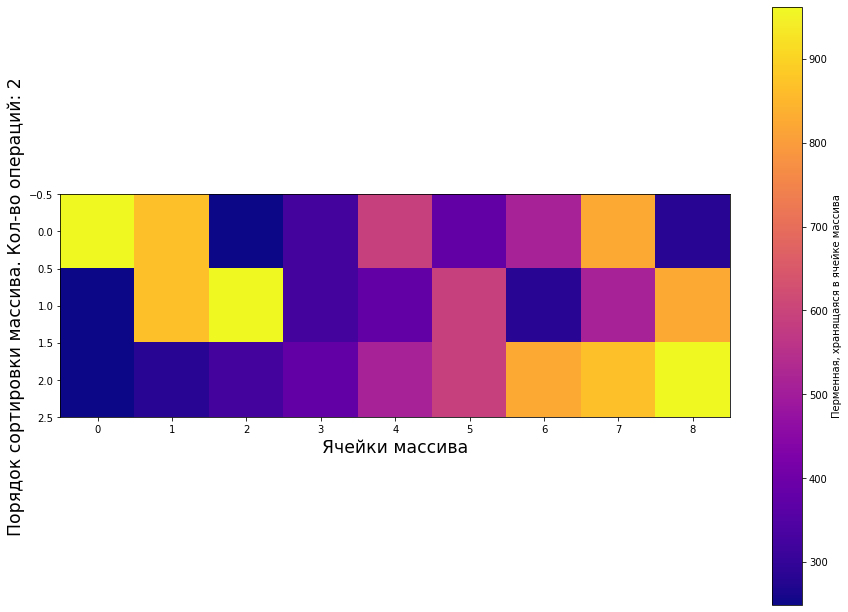

In [179]:
TSS.MergeSort(amount_of_files=3, amount_of_cicles=2, create_result_log=True)

Изначальный массив: [923 174 189 577 546 881 857 496 189 418 399 356 787 454 643 318 507 438
 825]
Отсортированный массив: [174 189 189 318 356 399 418 438 454 496 507 546 577 643 787 825 857 881
 923]
Кол-во итераций: 2


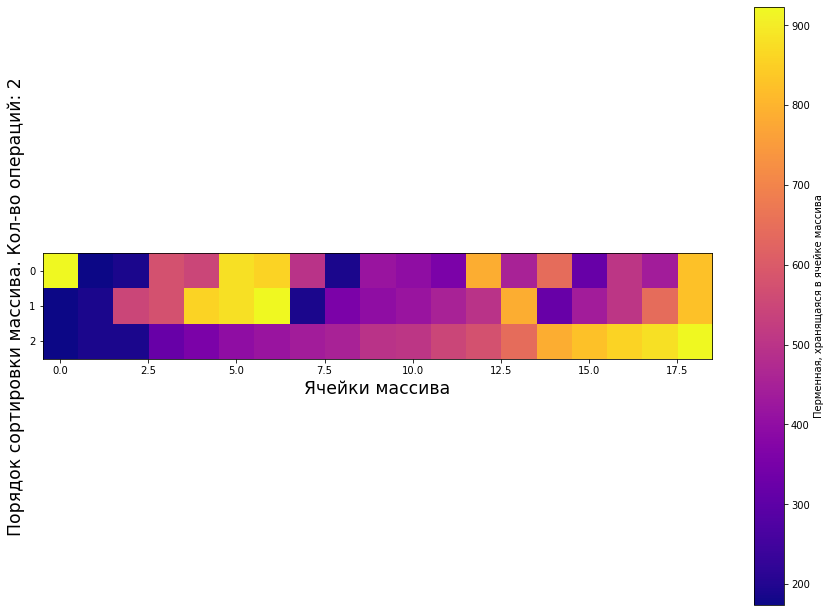

In [170]:
TSS.MergeSort(amount_of_files=7, amount_of_num=19, create_result_log=True)

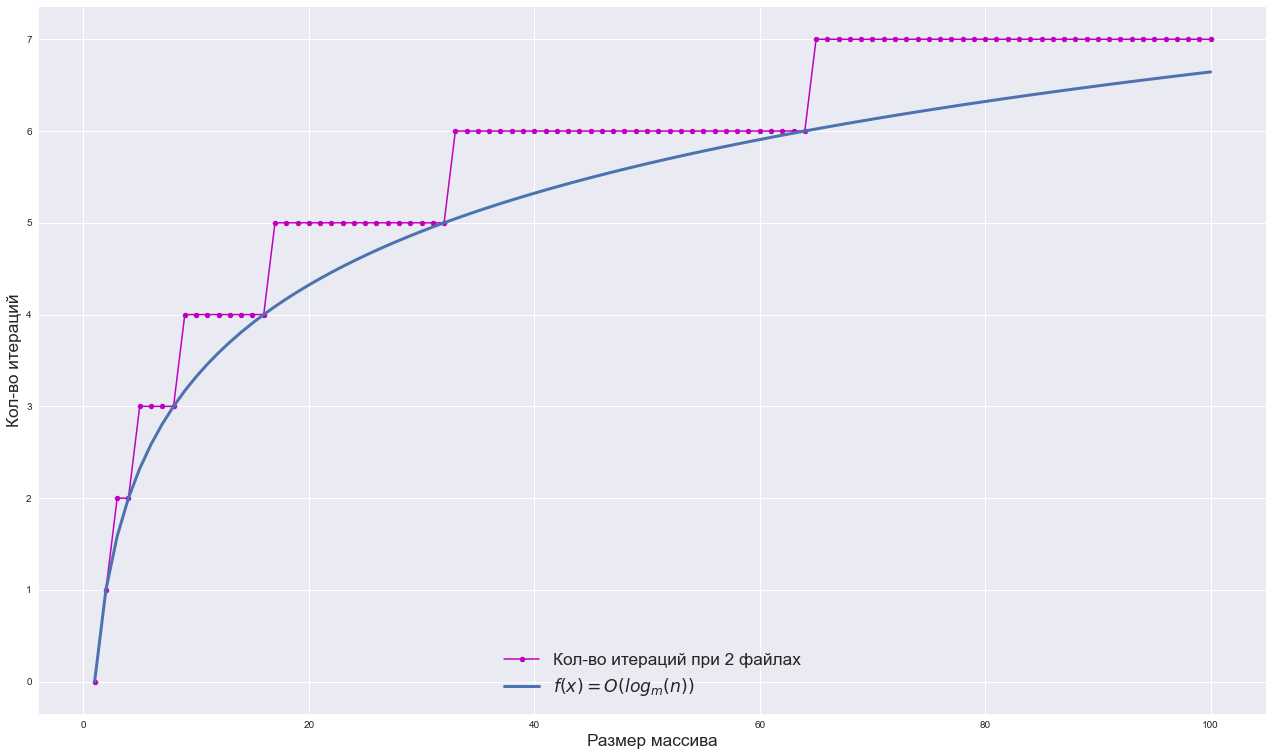

In [155]:
TSS.CalculateAlgorithmEfficiency(warst_situation=False, amount_of_files=2)

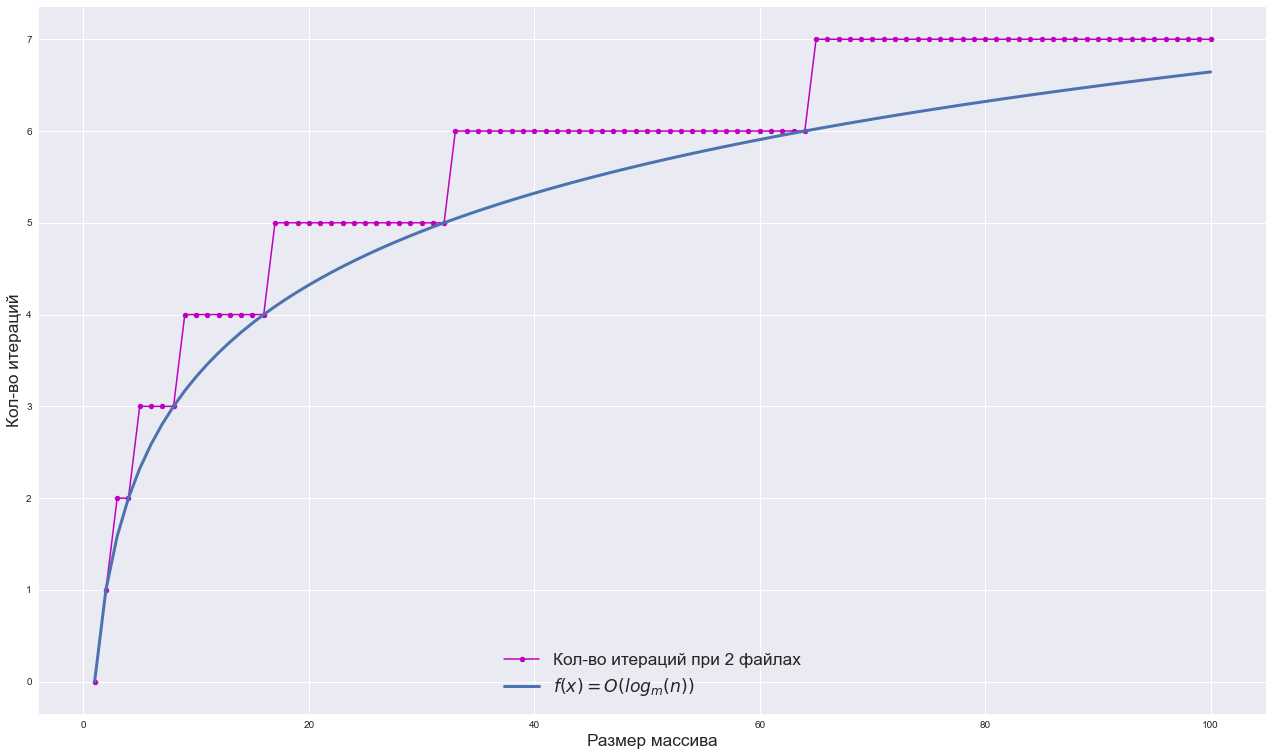

In [156]:
TSS.CalculateAlgorithmEfficiency(warst_situation=True, amount_of_files=2)

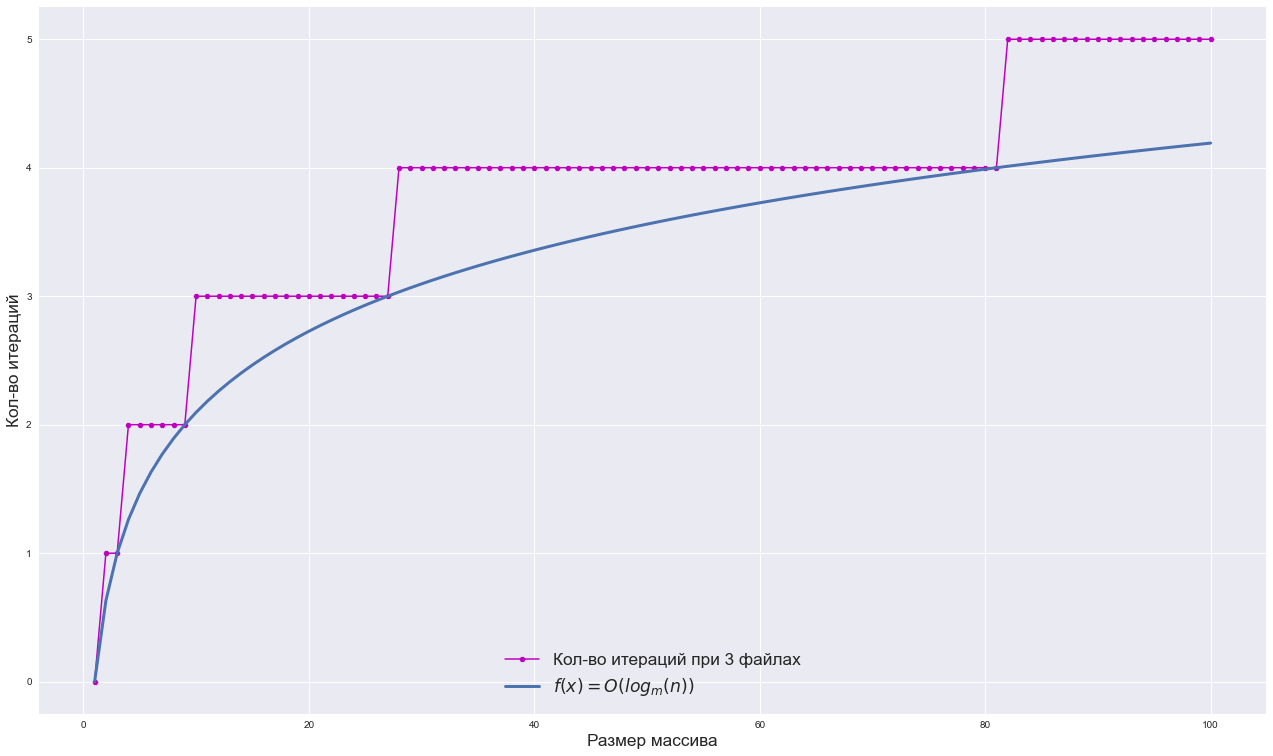

In [157]:
TSS.CalculateAlgorithmEfficiency(warst_situation=False, amount_of_files=3)

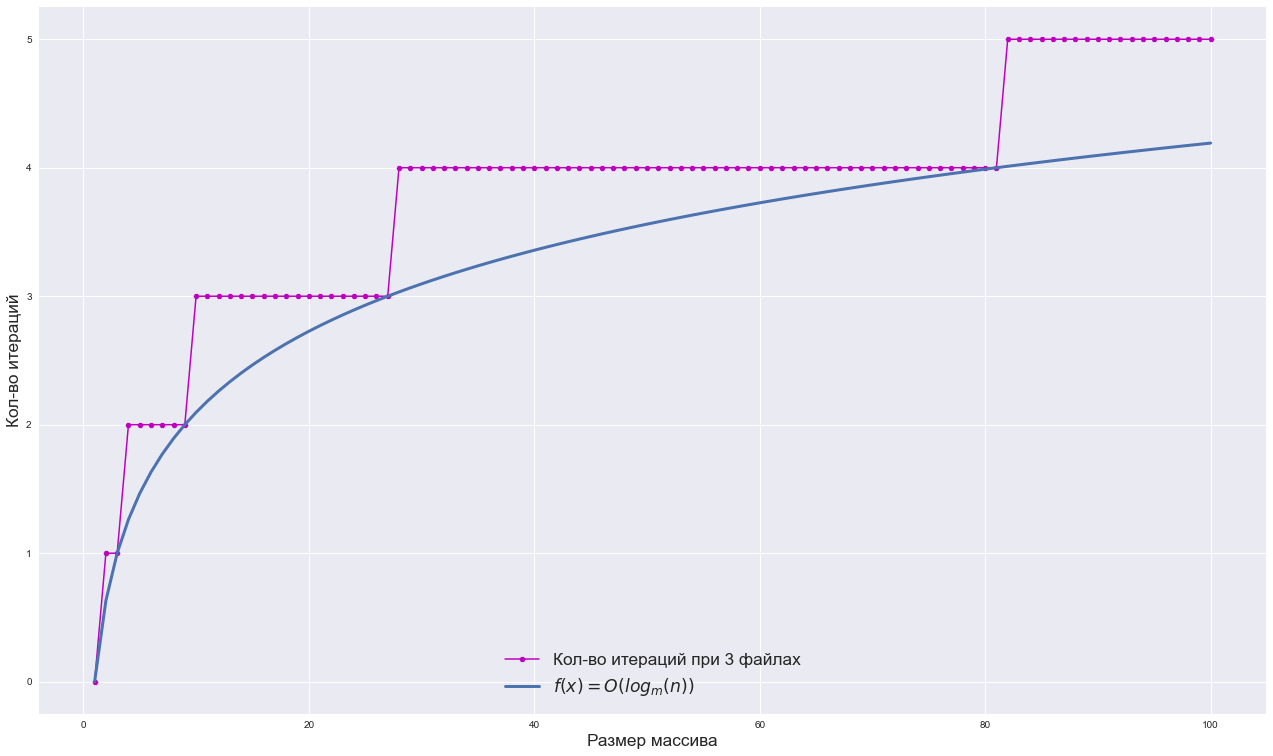

In [158]:
TSS.CalculateAlgorithmEfficiency(warst_situation=True, amount_of_files=3)

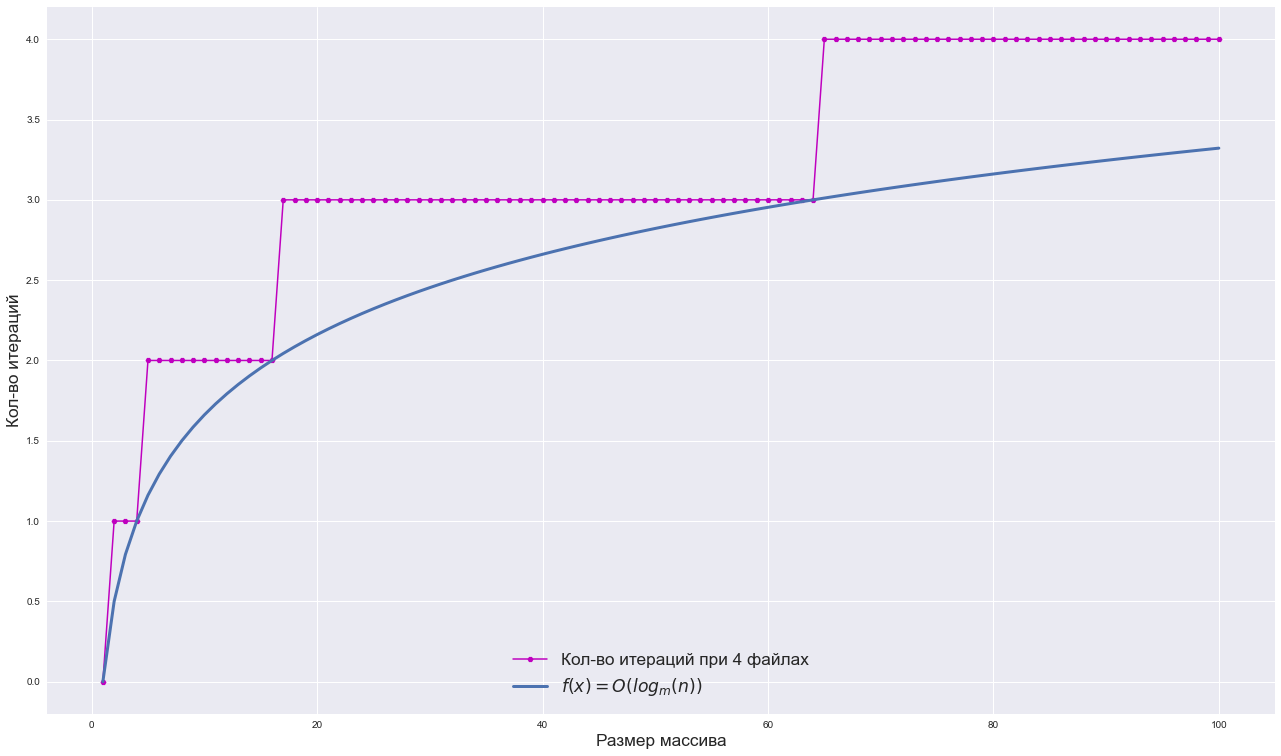

In [159]:
TSS.CalculateAlgorithmEfficiency(warst_situation=False, amount_of_files=4)

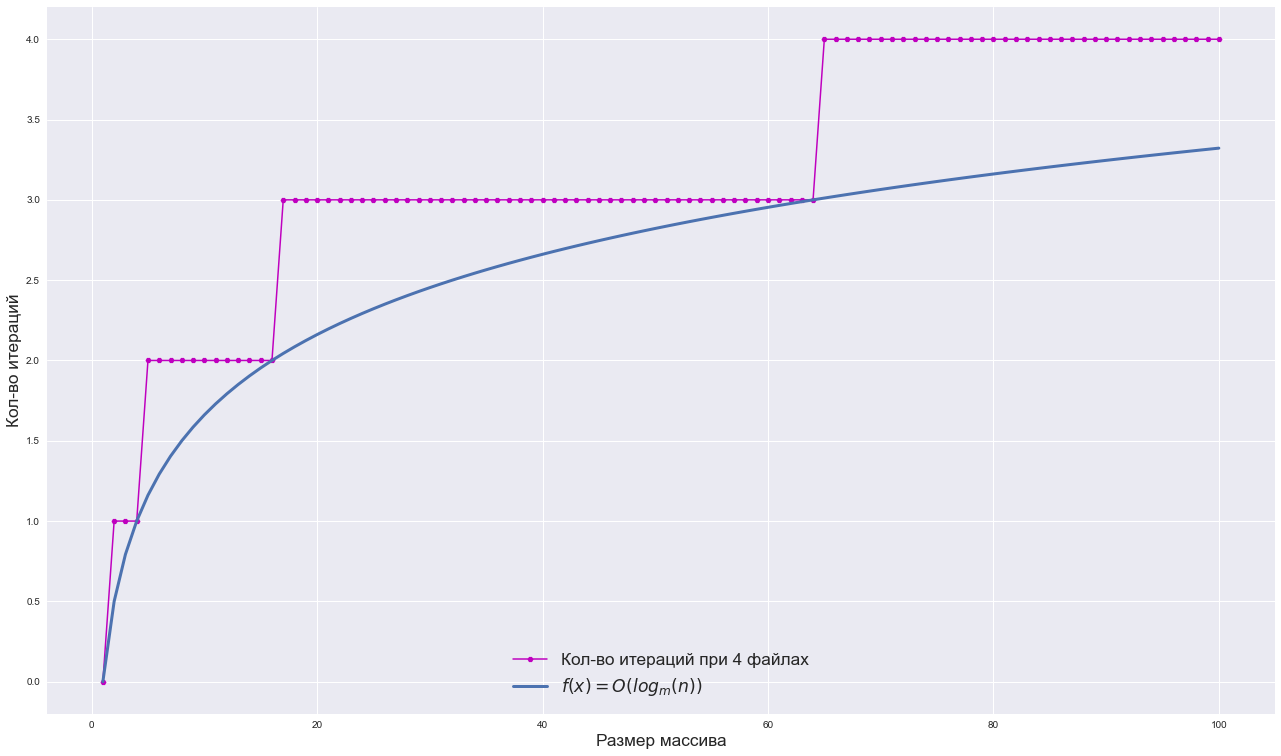

In [160]:
TSS.CalculateAlgorithmEfficiency(warst_situation=True, amount_of_files=4)

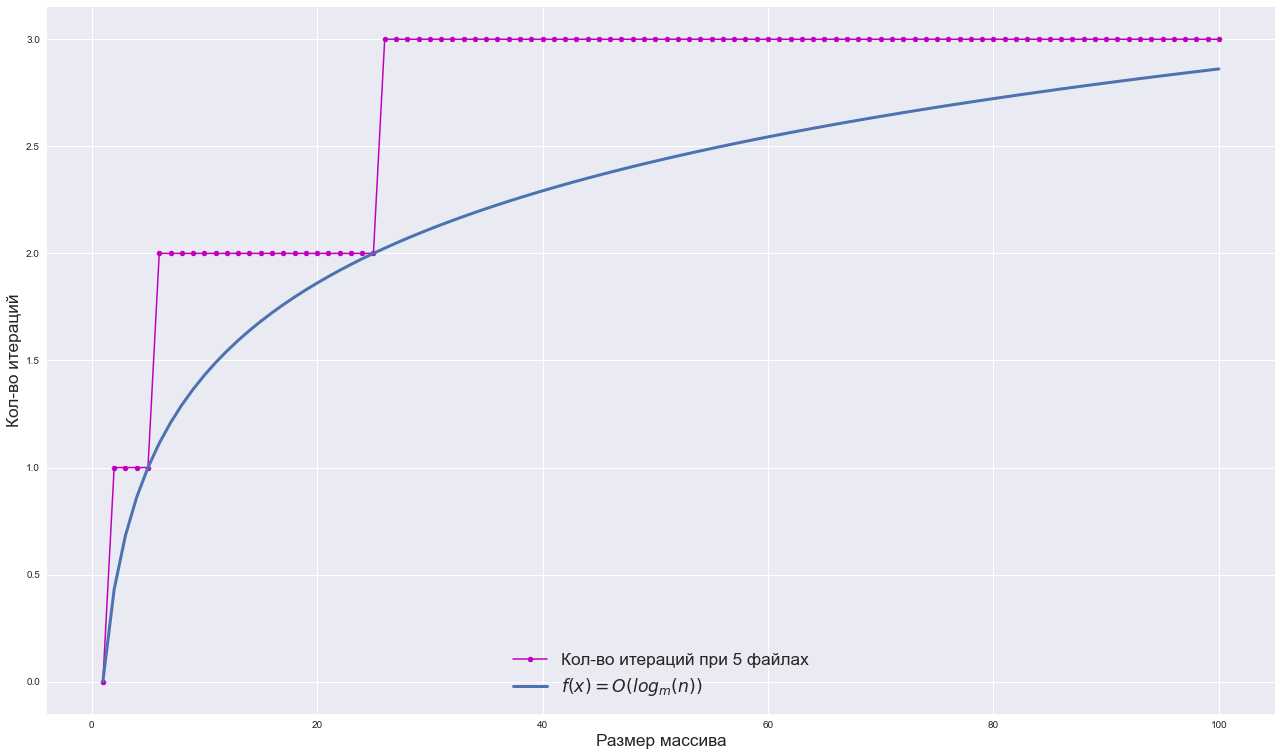

In [161]:
TSS.CalculateAlgorithmEfficiency(warst_situation=False, amount_of_files=5)

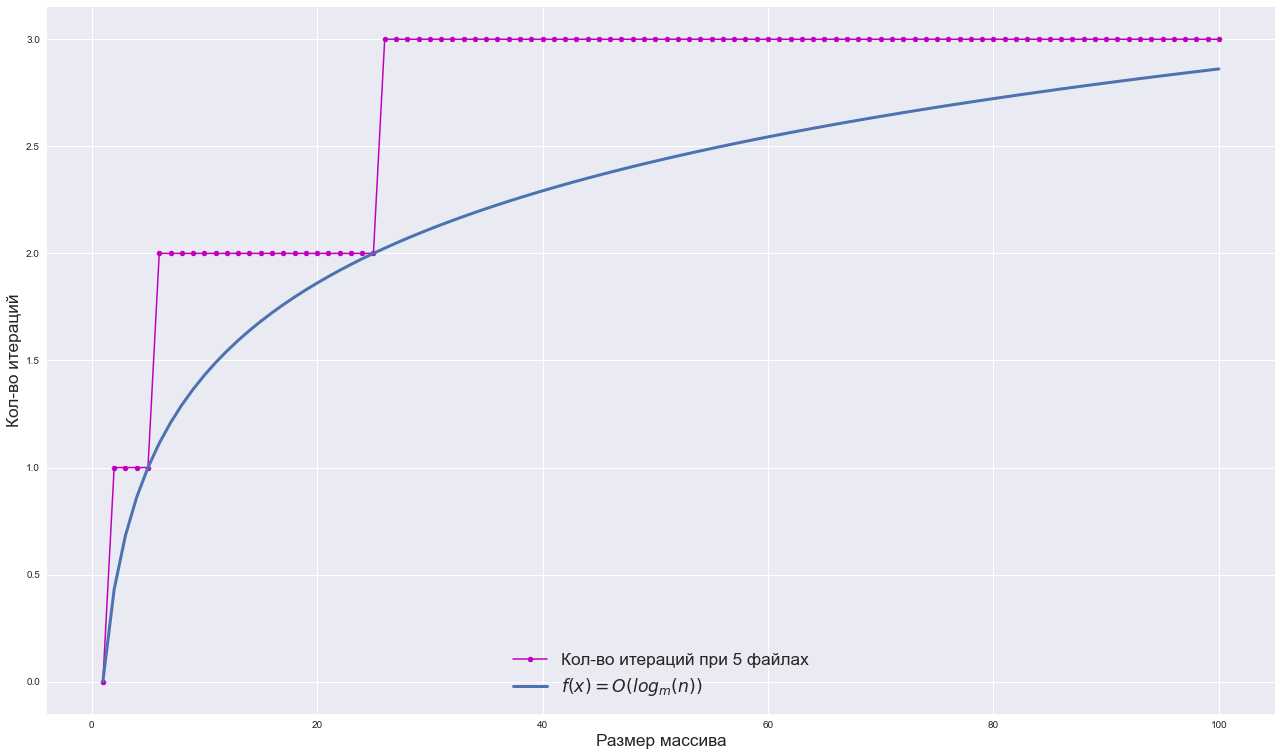

In [162]:
TSS.CalculateAlgorithmEfficiency(warst_situation=True, amount_of_files=5)

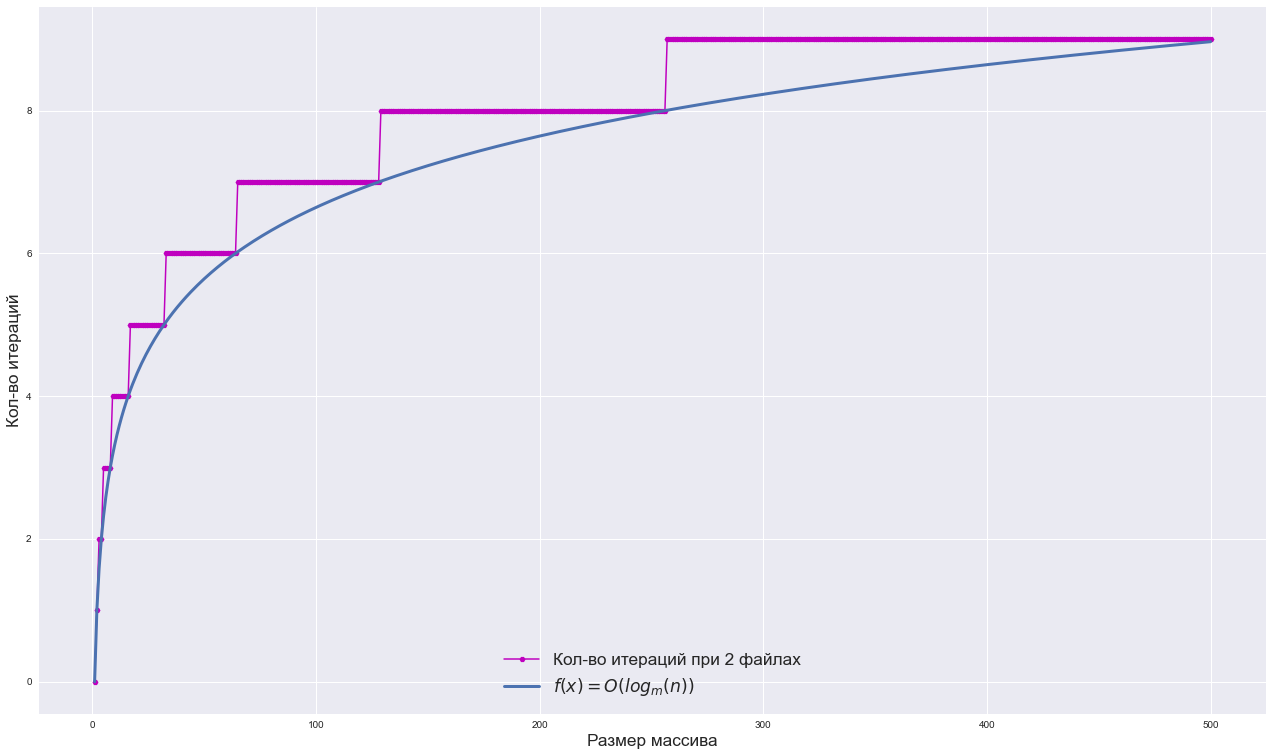

In [163]:
TSS.CalculateAlgorithmEfficiency(1, 500, warst_situation=True, amount_of_files=2)

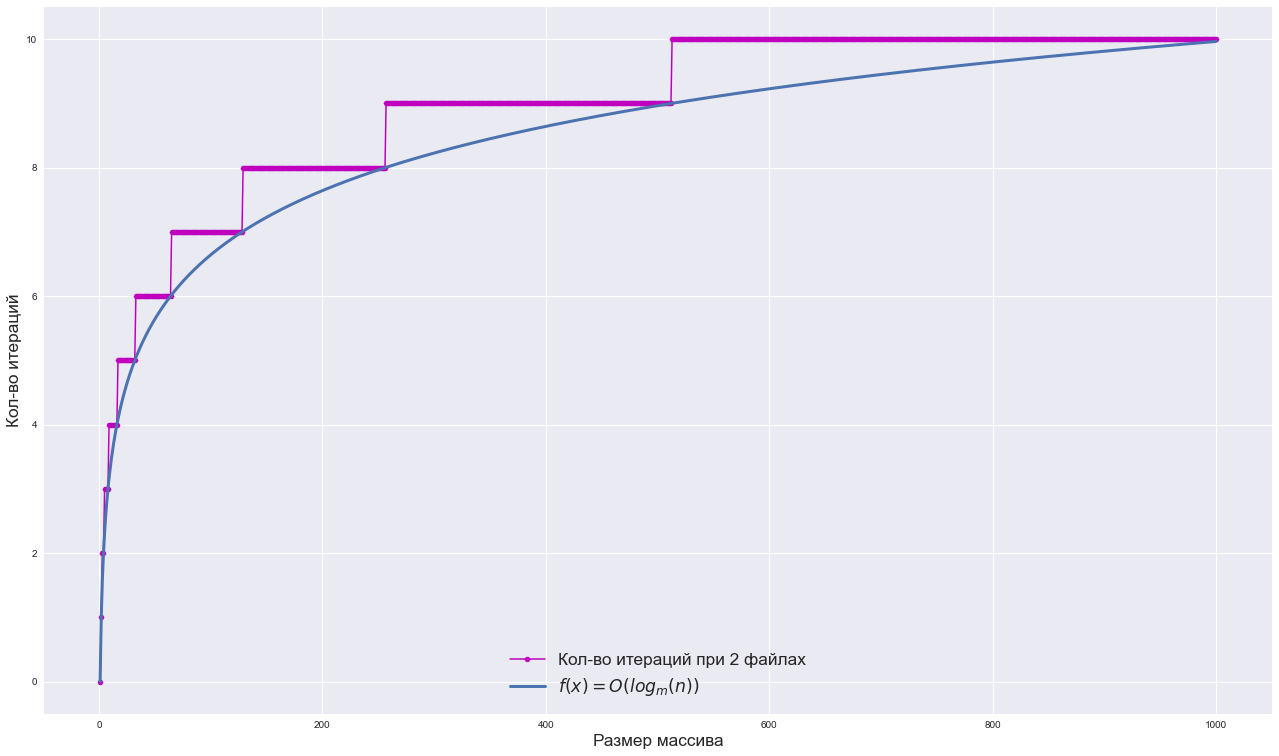

In [164]:
TSS.CalculateAlgorithmEfficiency(1, 1000, warst_situation=True, amount_of_files=2)

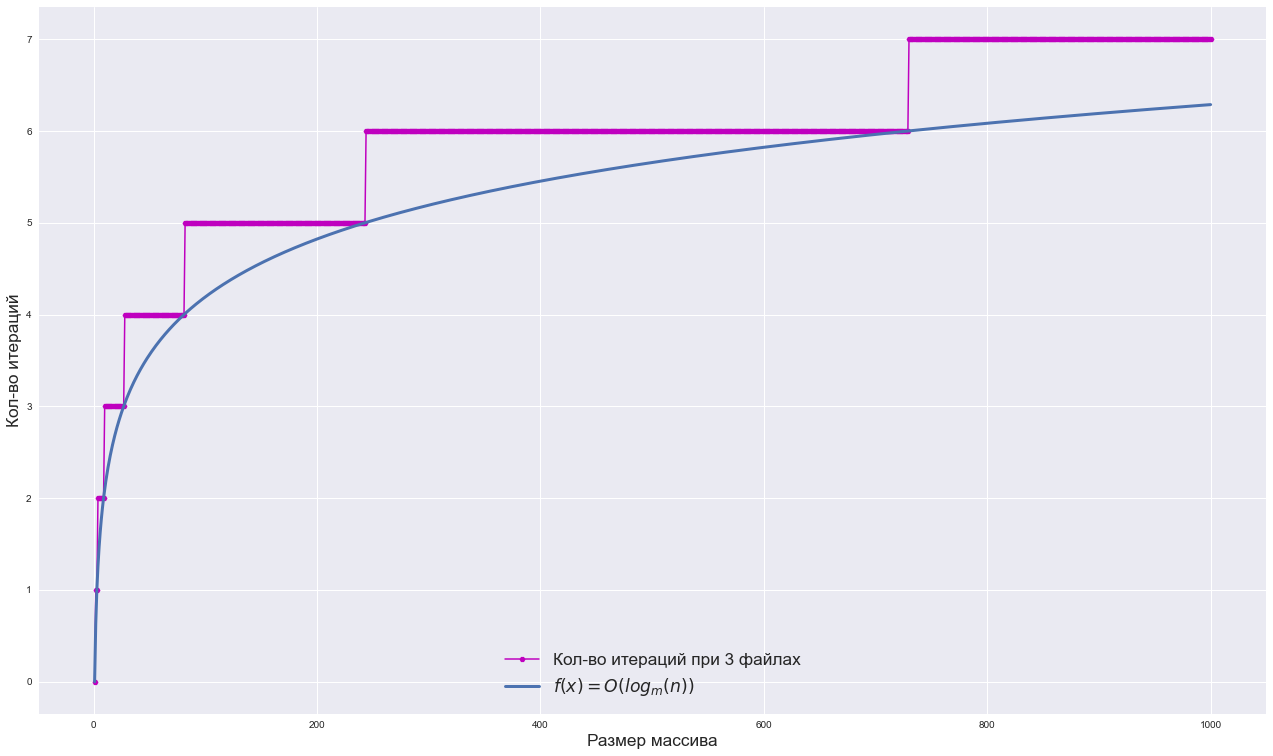

In [165]:
TSS.CalculateAlgorithmEfficiency(1, 1000, warst_situation=True, amount_of_files=3)

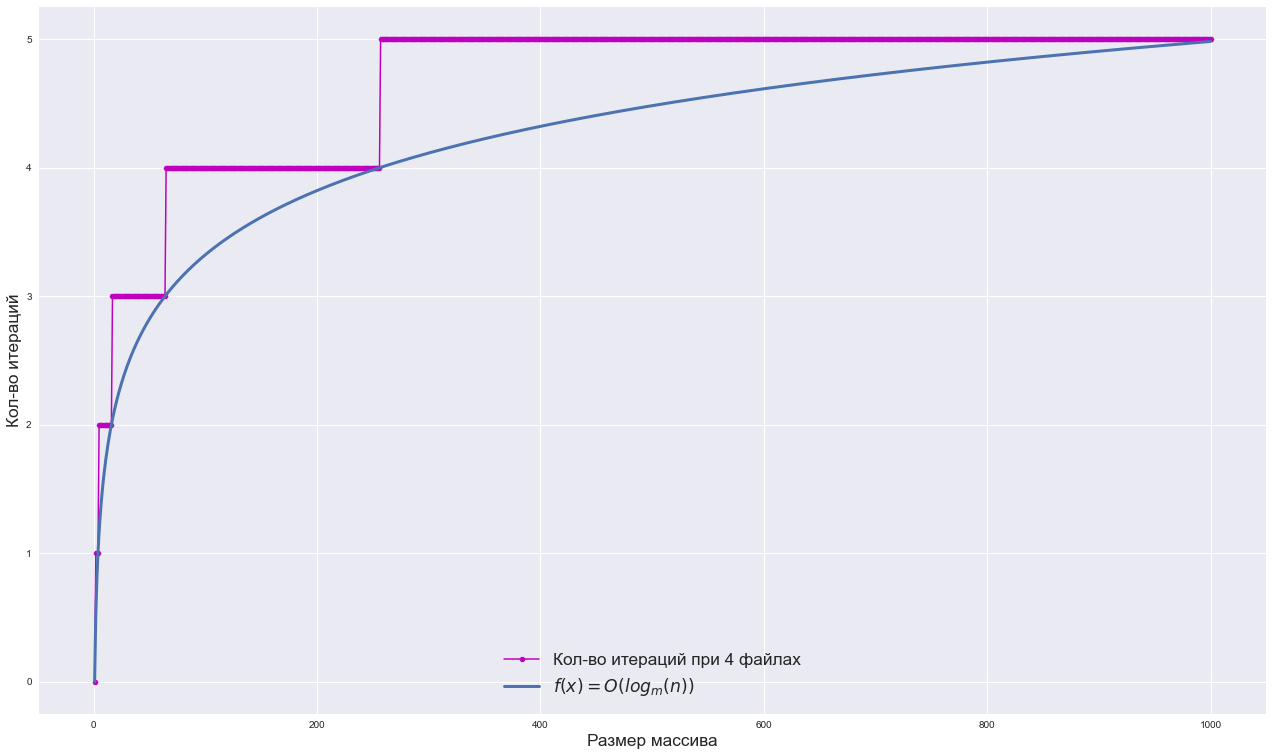

In [166]:
TSS.CalculateAlgorithmEfficiency(1, 1000, warst_situation=True, amount_of_files=4)

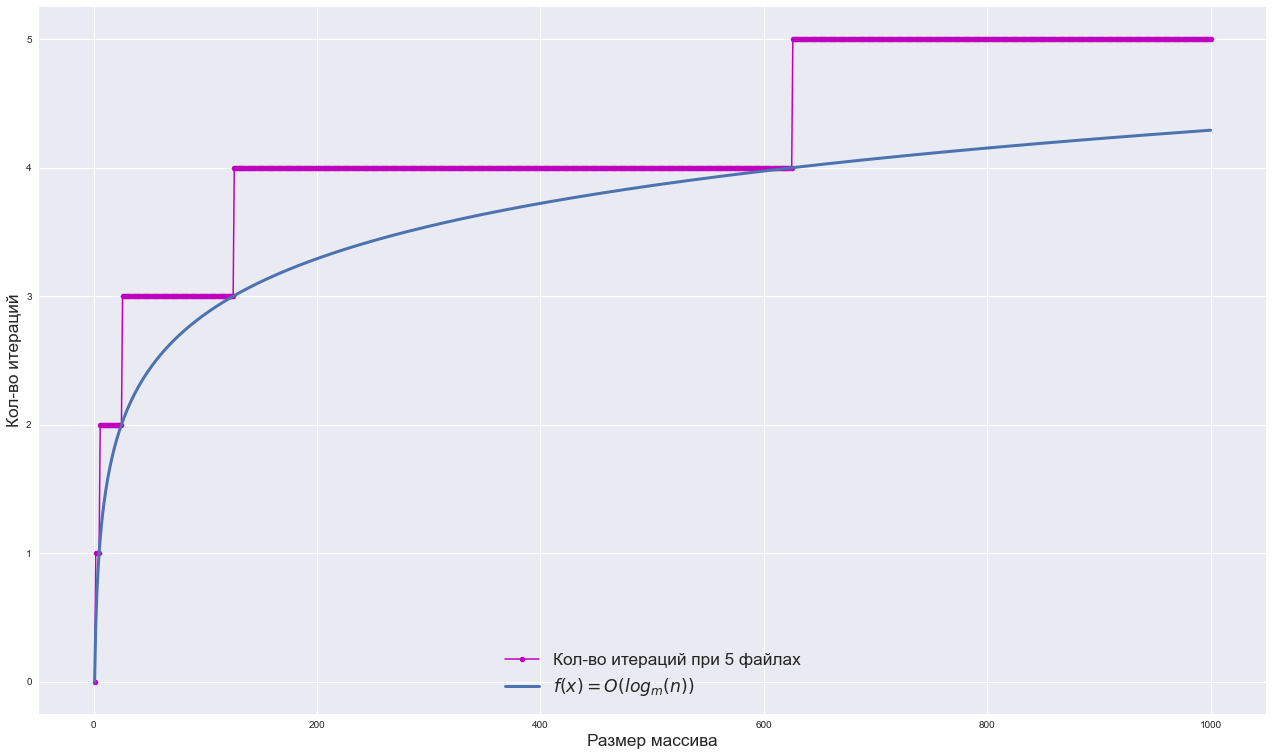

In [167]:
TSS.CalculateAlgorithmEfficiency(1, 1000, warst_situation=True, amount_of_files=5)